In [2]:
import os, sys
import pandas as pd
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
DATA_PATH = '/Users/holger/Desktop/master_thesis/data/arodz12/'
UNIPROT_ID = 'P00720'
DF_STRUCMAP = pd.read_excel(DATA_PATH + 'arodz12_protherm_singlemut_directonly.xls')
PDBS = DF_STRUCMAP['ProTherm PDB B']
PDBS = PDBS[252:526].unique()
PDBS

array(['1dya', '1dyb', '1dyc', '1dyd', '1dye', '1dyf', '1dyg', '1l00',
       '1l02', '1l03', '1l05', '1l06', '1l07', '1l08', '1l09', '1l10',
       '1l11', '1l12', '1l13', '1l14', '1l15', '1l16', '1l19', '1l20',
       '1l21', '1l22', '1l23', '1l24', '1l25', '1l26', '1l27', '1l28',
       '1l29', '1l30', '1l31', '1l32', '1l33', '1l34', '1l37', '1l38',
       '1l44', '1l45', '1l46', '1l47', '1l48', '1l52', '1l53', '1l56',
       '1l57', '1l58', '1l60', '1l69', '1l98', '1l99'], dtype=object)

In [3]:
def download_pdb(pdbcode, datadir, downloadurl="https://files.rcsb.org/download/"):
    """
    Downloads a PDB file from the Internet and saves it in a data directory.
    :param pdbcode: The standard PDB ID e.g. '3ICB' or '3icb'
    :param datadir: The directory where the downloaded file will be saved
    :param downloadurl: The base PDB download URL, cf.
        `https://www.rcsb.org/pages/download/http#structures` for details
    :return: the full path to the downloaded PDB file or None if something went wrong
    """
    pdbfn = pdbcode + ".pdb"
    url = downloadurl + pdbfn
    outfnm = os.path.join(datadir, pdbfn)
    try:
        urllib.request.urlretrieve(url, outfnm)
        return outfnm
    except Exception as err:
        print(str(err), file=sys.stderr)
        return None


In [4]:
# Downlaod structures
for i in range(len(PDBS)):
    download_pdb(PDBS[i], DATA_PATH + 'pdbs_P00720/')

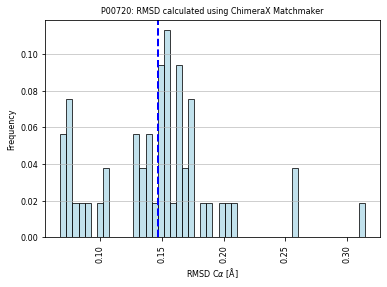

In [24]:
rmsd_list = [0.15430030197139177, 0.15396657998982644, 0.15336617645524647, 0.1713034145934, 0.13419710614056554, 0.14889989511455679, 0.1843101749134094, 0.2568039449473496, 0.08541934814819244, 0.12770744952941648, 0.10307862718971815, 0.09810608310523294, 0.07515602490955081, 0.06805436384940758, 0.0747873119261784, 0.10613182012310933, 0.07793385248463479, 0.06789502832053647, 0.07480278373226891, 0.07379782757404814, 0.06761811393211464, 0.14309377097658146, 0.12744928348947204, 0.1476223647919568, 0.15500835775235774, 0.19081967349529816, 0.1391858547221202, 0.1323953735204282, 0.19879827167293776, 0.09103697568757432, 0.16590358975008626, 0.14906342581429918, 0.13850279062619172, 0.17227302886658577, 0.16542265895070152, 0.17049000519506766, 0.1505862009163745, 0.17367285848019018, 0.14669020189121576, 0.13080498543440364, 0.15762695242993335, 0.15340889513250905, 0.15610042145598244, 0.16338739558907922, 0.2025420160143077, 0.14063460326543503, 0.31448288030064486, 0.17615748249328986, 0.166048605320032, 0.16271138090565768, 0.20840408170040747, 0.16847776908800166, 0.2564009114351758]
output_variance_np = np.asarray(rmsd_list)
# Create histogram of means
hist,bin_edges = np.histogram(rmsd_list)
weights = np.ones_like(rmsd_list) / len(rmsd_list)
n, bins, patches = plt.hist(rmsd_list, 50, weights = weights, facecolor='lightblue', edgecolor='k', alpha=0.75)
plt.grid(axis='y', alpha=0.75)
plt.xlabel(r'RMSD C$\alpha$ [Å]',fontsize=8)
plt.ylabel('Frequency',fontsize=8)
plt.xticks(fontsize=8,rotation='vertical')
plt.yticks(fontsize=8)
plt.ylabel('Frequency',fontsize=8)
plt.title('P00720: RMSD calculated using ChimeraX Matchmaker',fontsize=8)
plt.axvline(np.mean(rmsd_list), color='b', linestyle='dashed', linewidth=2)
plt.savefig('/Users/holger/Desktop/master_thesis/data/arodz12/figs/rmsd_dis_P00720.png', dpi=1200, bbox_inches = 'tight')

In [13]:
len(rmsd_list)

53

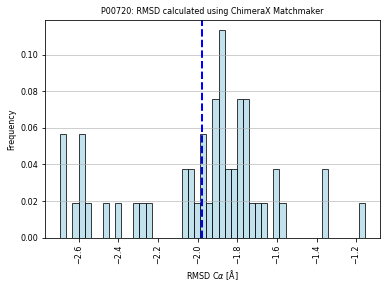

In [26]:
rmsd_list = np.log(np.array([0.15430030197139177, 0.15396657998982644, 0.15336617645524647, 0.1713034145934, 0.13419710614056554, 0.14889989511455679, 0.1843101749134094, 0.2568039449473496, 0.08541934814819244, 0.12770744952941648, 0.10307862718971815, 0.09810608310523294, 0.07515602490955081, 0.06805436384940758, 0.0747873119261784, 0.10613182012310933, 0.07793385248463479, 0.06789502832053647, 0.07480278373226891, 0.07379782757404814, 0.06761811393211464, 0.14309377097658146, 0.12744928348947204, 0.1476223647919568, 0.15500835775235774, 0.19081967349529816, 0.1391858547221202, 0.1323953735204282, 0.19879827167293776, 0.09103697568757432, 0.16590358975008626, 0.14906342581429918, 0.13850279062619172, 0.17227302886658577, 0.16542265895070152, 0.17049000519506766, 0.1505862009163745, 0.17367285848019018, 0.14669020189121576, 0.13080498543440364, 0.15762695242993335, 0.15340889513250905, 0.15610042145598244, 0.16338739558907922, 0.2025420160143077, 0.14063460326543503, 0.31448288030064486, 0.17615748249328986, 0.166048605320032, 0.16271138090565768, 0.20840408170040747, 0.16847776908800166, 0.2564009114351758]).reshape(-1, 1))
sc = StandardScaler()
output_variance_np = sc.fit(np.asarray(rmsd_list))
# Create histogram of means
hist,bin_edges = np.histogram(rmsd_list)
weights = np.ones_like(rmsd_list) / len(rmsd_list)
n, bins, patches = plt.hist(rmsd_list, 50, weights = weights, facecolor='lightblue', edgecolor='k', alpha=0.75)
plt.grid(axis='y', alpha=0.75)
plt.xlabel(r'RMSD C$\alpha$ [Å]',fontsize=8)
plt.ylabel('Frequency',fontsize=8)
plt.xticks(fontsize=8,rotation='vertical')
plt.yticks(fontsize=8)
plt.ylabel('Frequency',fontsize=8)
plt.title('P00720: RMSD calculated using ChimeraX Matchmaker',fontsize=8)
plt.axvline(np.mean(rmsd_list), color='b', linestyle='dashed', linewidth=2)
plt.savefig('/Users/holger/Desktop/master_thesis/data/arodz12/figs/rmsd_dis_P00720.png', dpi=1200, bbox_inches = 'tight')